# Overview for param set 1
This params set deals with the effect of $\tau_1$/$\tau_2$ and $\gamma$ on the acfs and ccfs.

First the acf/ccfs is analyzed when both $\tau$ parameters are the same.
Later it is analyzed what happens if they are different

In [7]:
import os
from main_multiple_runs import R, T, T_cycles, NoiseType
from plotting.plotting import plot_with_percentiles, plot_fwahh, fwahh
from pathlib import Path
from file_handling import load_ensemble
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

results, steps, steps_tau1, steps_tau2, ensembles, R = load_ensemble(Path('../../results/params_symmetric_increasing_taus_1000_500_0'))
steps_len = len(steps)

# OU Sample
A sample run from both Ornstein Uhlenbeck processes for debug purposes

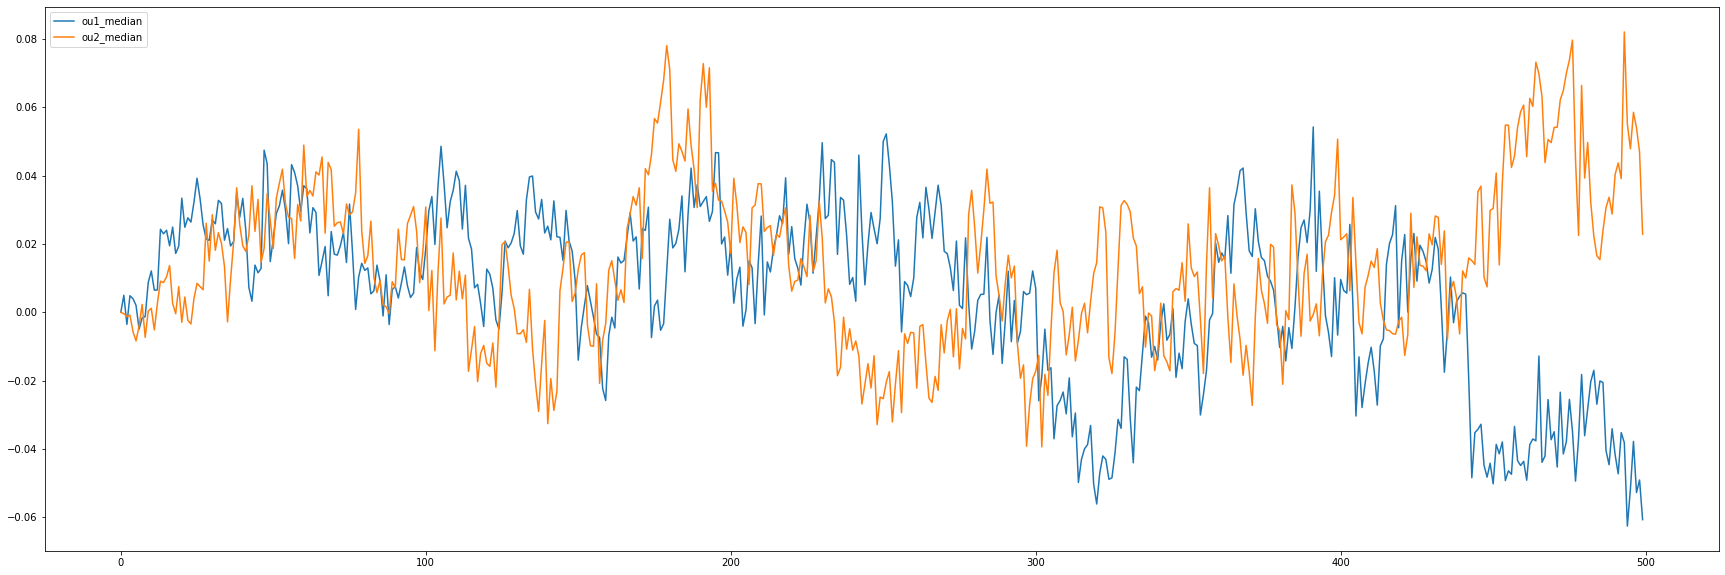

In [8]:
results[0]['ensemble'].filter(like='median').filter(like='ou').plot()

# ACF
Ensemble of autocorrelation functions for each parameter set where $\tau_1 = \tau_2$.

$e$ is 0.5

## White Noise

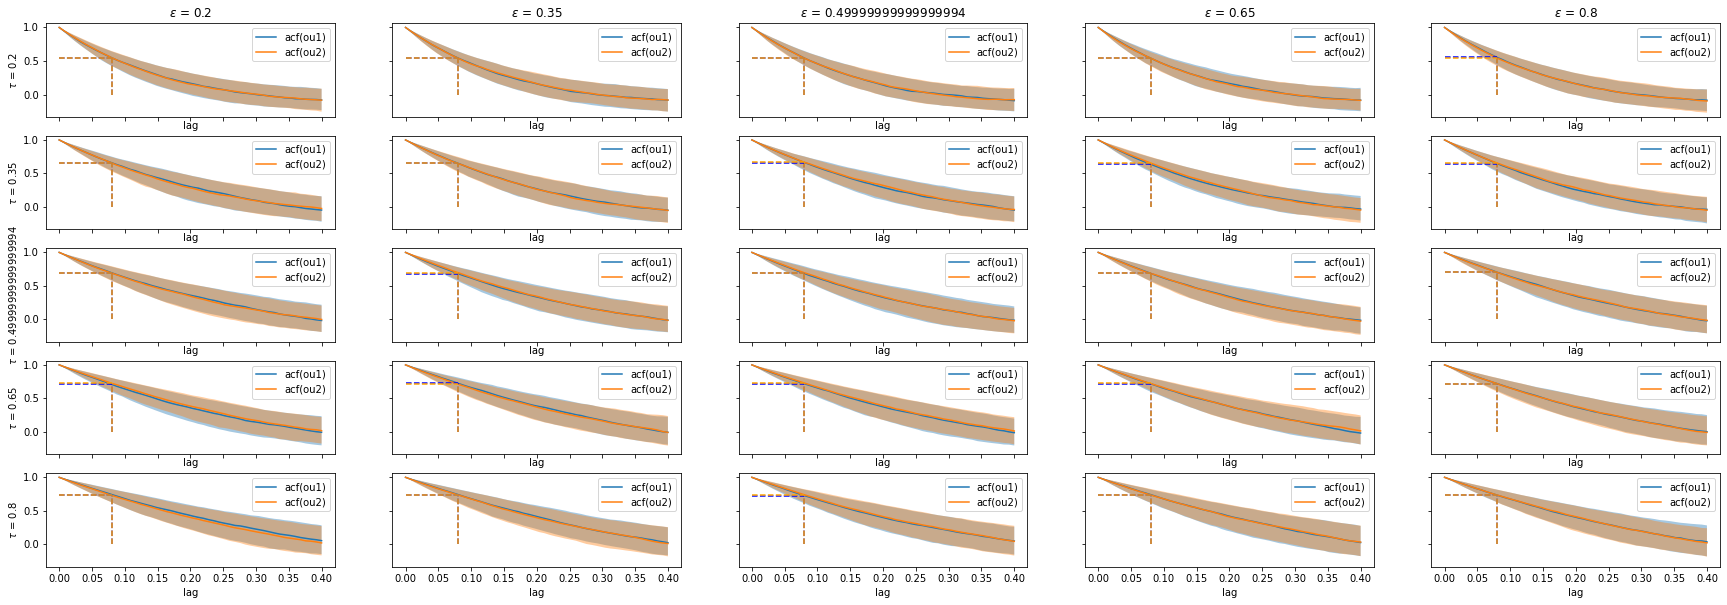

In [9]:

fig, axs = plt.subplots(steps_len - 2, steps_len - 2, sharey=True, sharex=True)
labels = ['ou1', 'ou2']
xlabel = 'lag'
ylabel = 'acf'

for i, tau in enumerate(steps[1:-1]):
    for j, e in enumerate(steps[1:-1]):
        res = [res for res in results if res['p']['noiseType']['type'] == NoiseType.WHITE and res['p']['tau1'] == tau and res['p']['e'] == e][0]
        median = res['acf_ensemble']['acf_ou1_median']
        
        plot_with_percentiles(res['acf_ensemble'], axs[i][j], 'acf(ou1)', prefix='acf_ou1_')
        plot_with_percentiles(res['acf_ensemble'], axs[i][j], 'acf(ou2)', prefix='acf_ou2_')
        
        axs[i][j].set_xlabel(xlabel)
        
        for lag in [median.index[round(len(median.index) * 0.2)]]:
            y_ou1 = median[lag]
            y_ou2 = res['acf_ensemble']['acf_ou2_median'][lag]

            axs[i][j].plot([lag, lag], [0, y_ou1], color='blue', linestyle='--')
            axs[i][j].plot([lag, lag], [0, y_ou2], color='orange', linestyle='--')

            axs[i][j].plot([0, lag], [y_ou1, y_ou1], color='blue', linestyle='--')
            axs[i][j].plot([0, lag], [y_ou2, y_ou2], color='orange', linestyle='--')
        
        if i == 0:
            axs[i][j].set_title(f"$\epsilon$ = {e}")
        if j == 0:
#             fig.annotate(f"$\tau$ = {tau}", [0, 1])
            axs[i][j].set_ylabel(f"$\\tau$ = {tau}")
        
# fig.suptitle('estimated acf from ensemble simulation')
# fig.tight_layout()

## Red Noise

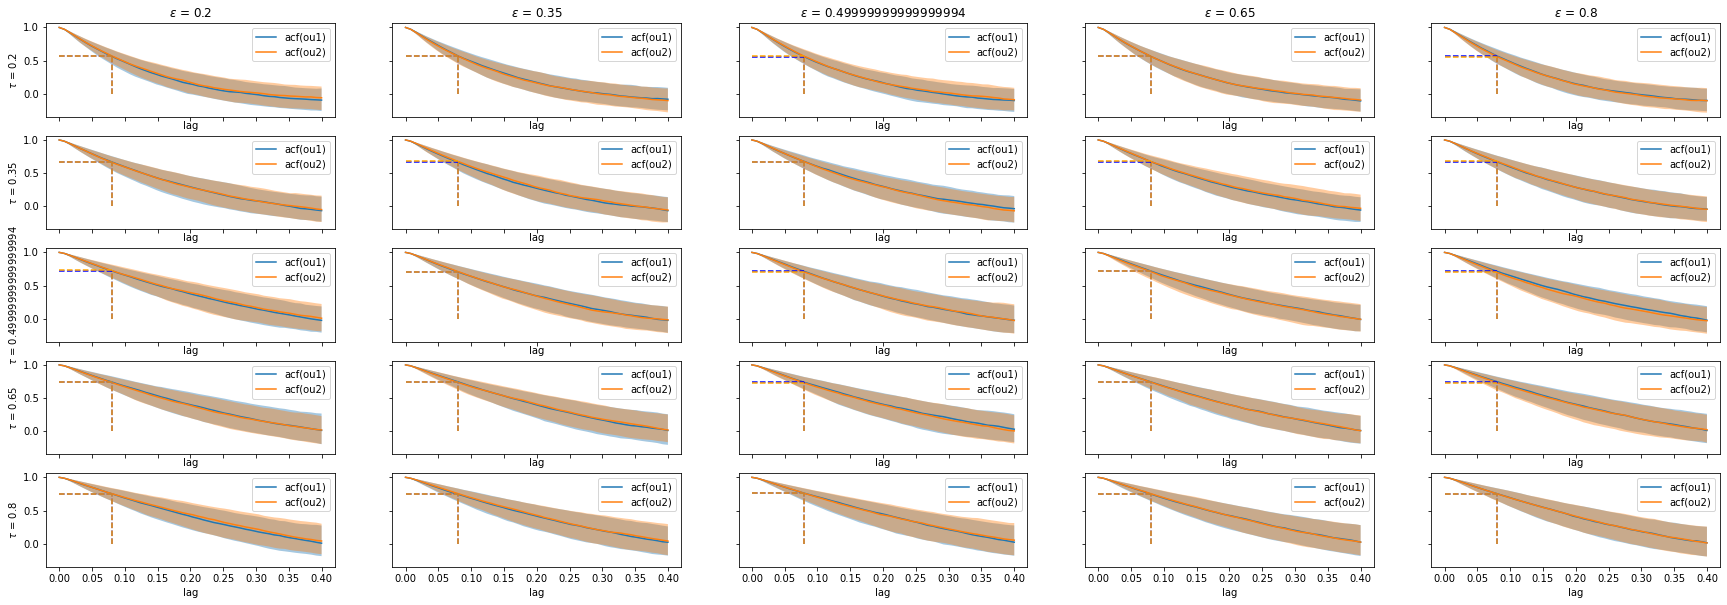

In [10]:

fig, axs = plt.subplots(steps_len - 2, steps_len - 2, sharey=True, sharex=True)
labels = ['ou1', 'ou2']
xlabel = 'lag'
ylabel = 'acf'

for i, tau in enumerate(steps[1:-1]):
    for j, e in enumerate(steps[1:-1]):
        res = [res for res in results if res['p']['noiseType']['type'] == NoiseType.RED and res['p']['tau1'] == tau and res['p']['e'] == e][0]
        median = res['acf_ensemble']['acf_ou1_median']
        
        plot_with_percentiles(res['acf_ensemble'], axs[i][j], 'acf(ou1)', prefix='acf_ou1_')
        plot_with_percentiles(res['acf_ensemble'], axs[i][j], 'acf(ou2)', prefix='acf_ou2_')
        
        axs[i][j].set_xlabel(xlabel)
        
        for lag in [median.index[round(len(median.index) * 0.2)]]:
            y_ou1 = median[lag]
            y_ou2 = res['acf_ensemble']['acf_ou2_median'][lag]

            axs[i][j].plot([lag, lag], [0, y_ou1], color='blue', linestyle='--')
            axs[i][j].plot([lag, lag], [0, y_ou2], color='orange', linestyle='--')

            axs[i][j].plot([0, lag], [y_ou1, y_ou1], color='blue', linestyle='--')
            axs[i][j].plot([0, lag], [y_ou2, y_ou2], color='orange', linestyle='--')
        
        if i == 0:
            axs[i][j].set_title(f"$\epsilon$ = {e}")
        if j == 0:
#             fig.annotate(f"$\tau$ = {tau}", [0, 1])
            axs[i][j].set_ylabel(f"$\\tau$ = {tau}")
        
# fig.suptitle('estimated acf from ensemble simulation')
# fig.tight_layout()


# CCF
Ensemble of cross correlation functions for each parameter set.
The red line indicates the full width at half height of the peak.

## White Noise

Text(0.5, 0.98, 'estimated ccf from ensemble simulation')

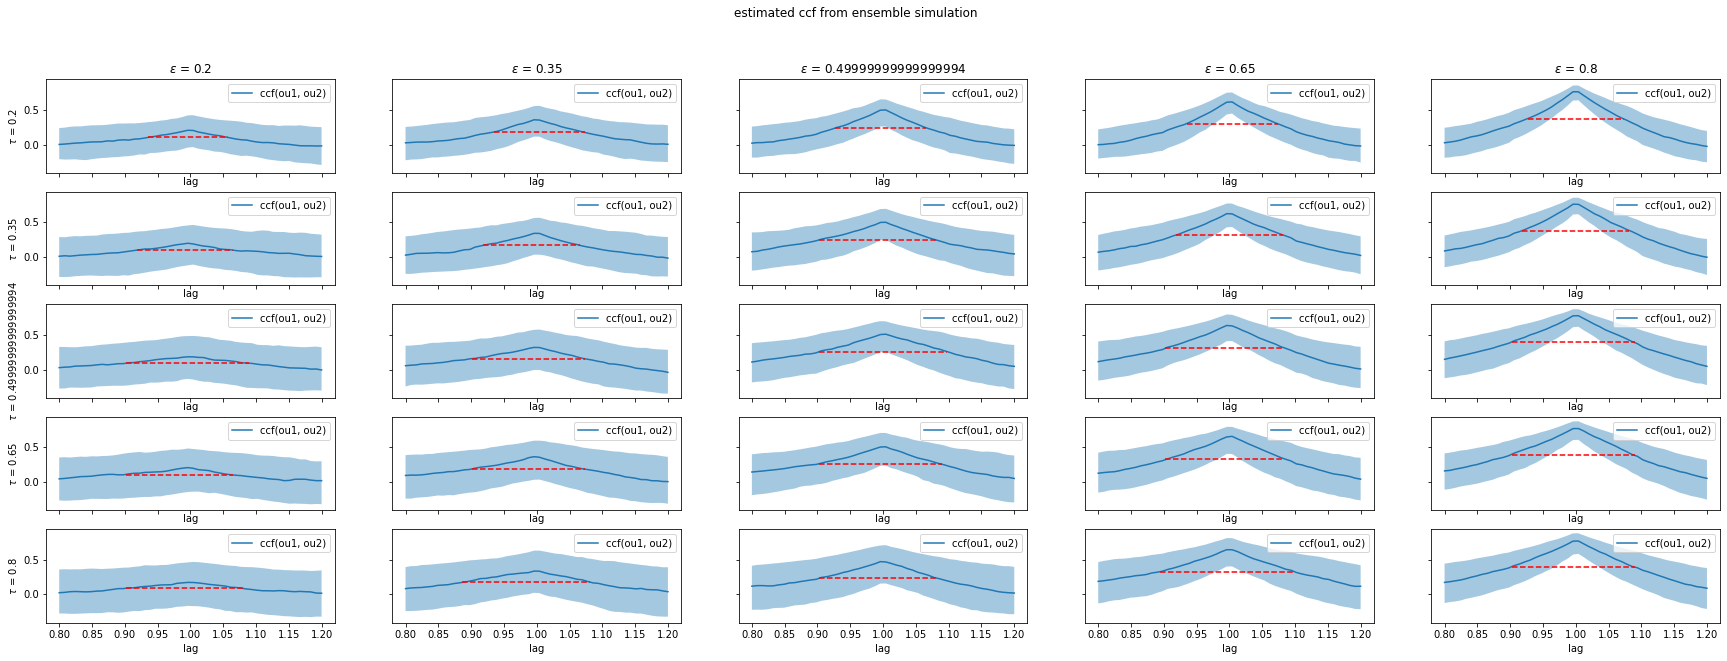

In [11]:
fig, axs = plt.subplots(steps_len - 2, steps_len - 2, sharey=True, sharex=True)
labels = ['ou1', 'ou2']
xlabel = 'lag'
ylabel = 'acf'

for i, tau in enumerate(steps[1:-1]):
    for j, e in enumerate(steps[1:-1]):
        res = [res for res in results if res['p']['noiseType']['type'] == NoiseType.WHITE and res['p']['tau1'] == tau and res['p']['e'] == e][0]
        median = res['ccf_ensemble']['ccf_median']
        
        plot_with_percentiles(res['ccf_ensemble'], axs[i][j], 'ccf(ou1, ou2)', prefix='ccf_')
        
        axs[i][j].set_xlabel(xlabel)
        
        plot_fwahh(axs[i][j], median)
        
        if i == 0:
            axs[i][j].set_title(f"$\epsilon$ = {e}")
        if j == 0:
#             fig.annotate(f"$\tau$ = {tau}", [0, 1])
            axs[i][j].set_ylabel(f"$\\tau$ = {tau}")
        
fig.suptitle('estimated ccf from ensemble simulation')
# fig.tight_layout()

## Red Noise

Text(0.5, 0.98, 'estimated ccf from ensemble simulation')

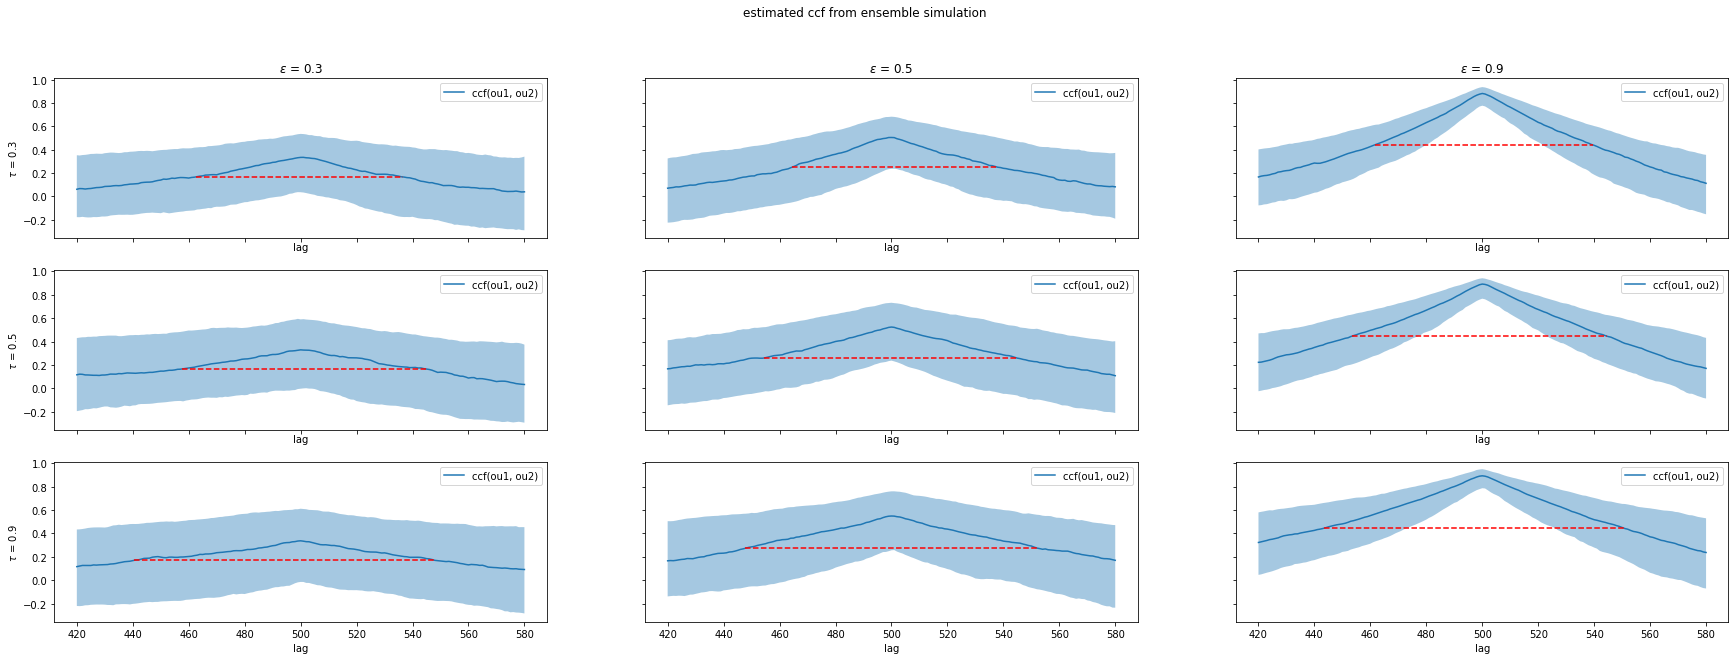

In [9]:
fig, axs = plt.subplots(3, 3, sharey=True, sharex=True)
labels = ['ou1', 'ou2']
xlabel = 'lag'
ylabel = 'acf'

for i, tau in enumerate([0.3, 0.5, 0.9]):
    for j, e in enumerate([0.3, 0.5, 0.9]):
        res = [res for res in results if res['p']['noiseType']['type'] == NoiseType.RED and res['p']['tau1'] == tau and res['p']['e'] == e][0]
        median = res['ccf_ensemble']['ccf_median']
        
        plot_with_percentiles(res['ccf_ensemble'], axs[i][j], 'ccf(ou1, ou2)', prefix='ccf_')
        
        axs[i][j].set_xlabel(xlabel)
        
        plot_fwahh(axs[i][j], median)
        
        if i == 0:
            axs[i][j].set_title(f"$\epsilon$ = {e}")
        if j == 0:
#             fig.annotate(f"$\tau$ = {tau}", [0, 1])
            axs[i][j].set_ylabel(f"$\\tau$ = {tau}")
        
fig.suptitle('estimated ccf from ensemble simulation')
# fig.tight_layout()

# Correlation Analysis

The peak height seems to correlate with $\epsilon$

The width with tau



In [12]:
from plotting.plotting import plt_correlation
plt_correlation(results)

#table?

TypeError: plt_correlation() missing 3 required positional arguments: 'steps', 'steps_tau', and 'yFn'

# Full Width at half height debugging

In [ ]:
from plotting.plotting import fwahh
print(len(results))
median = results[10]['ccf_ensemble']['ccf_median']
ax = median.plot(style='x')

[i_l, i_r], [x_l, x_r], width, hh = fwahh(median)

h_l = median[i_l]
h_r = median[i_r]

i_l_i = (median.index[max(0, x_l + (-1 if h_l > h_r else 1))] + median.index[x_l]) / 2
i_r_i = (median.index[x_r + (-1 if h_l > h_r else 1)] + median.index[x_r]) / 2
h_l_i = (median.iloc[max(0, x_l + (-1 if h_l > h_r else 1))] + median.iloc[x_l]) / 2
h_r_i = (median.iloc[x_r + (-1 if h_l > h_r else 1)] + median.iloc[x_r]) / 2

# ax.plot(x_peak_index, height, 'ro')
height = (h_l + h_r) / 2
ax.plot([i_l_i, i_r_i], [(h_l_i + h_r_i) / 2, (h_l_i + h_r_i) / 2])
ax.plot(i_l_i, h_l_i, 'yo')

x_debug = x_r+(-1 if h_l > h_r else 1)
ax.plot(median.index[x_debug], median.iloc[x_debug], 'yo')
ax.plot(500, hh, 'yo')

ax.plot(i_l_i, h_l_i, 'go')
ax.plot(i_r_i, h_r_i, 'go')
ax.plot(i_l, median[i_l], 'ro')
ax.plot(i_r, median[i_r], 'ro')